In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [84]:
%config InlineBackend.figure_format = 'retina'  # For high-resolution displays
%config InlineBackend.print_figure_kwargs = {'dpi': 200}  # Set DPI
sc.set_figure_params(vector_friendly=True, dpi_save=500)
sc.settings.figdir = '../../results/final_plot/'

In [3]:
#mesAdata = sc.read("../../processed_data/integrated_data/20241024_mesenchyme.h5ad")
#epiAdata = sc.read("../../processed_data/integrated_data/20241024_epithelium.h5ad")
adata = sc.read("../../processed_data/integrated_data/20241021_filtered_log_count.h5ad")

In [62]:
epiMeta = pd.read_csv("../../processed_data/framework/annotation/20250402_epi_meta.csv",index_col=0)
mesMeta = pd.read_csv("../../processed_data/framework/annotation/20250401_mes_meta.csv",index_col=0)

In [5]:
adata = sc.read("../../processed_data/integrated_data/20241021_filtered_log_count.h5ad")

In [6]:
scMeta = pd.read_csv("../../processed_data/metadata/scMetadata_latest.csv",index_col=0)

In [8]:
mesRed = pd.read_csv("../../processed_data/framework/embedding/20241119_mes_trimap.csv",index_col=0)
epiRed = pd.read_csv("../../processed_data/framework/embedding/20241126_epi_trimap.csv",index_col=0)

In [29]:
mesAdata = adata[mesMeta.index]
epiAdata = adata[epiMeta.index]

In [43]:
keepname = pd.read_csv('../../processed_data/framework/attributeName/cellName_mes_keep20241119.csv',index_col=0)

In [48]:
mes = sc.read("../../processed_data/integrated_data/20241118_mes.h5ad")

In [51]:
np.array(keepname["0"])

array(['ToothNc_Junjun_AAACCCAAGCTAAGTA-1_1',
       'ToothNc_Junjun_AAACCCACATCTATCT-1_1',
       'ToothNc_Junjun_AAACCCAGTAGAATGT-1_1', ...,
       'MolarP12_Tomoko_TTGTTTGTCTTTGGAG-1_1',
       'MolarP12_Tomoko_TTTGACTAGTGGTGGT-1_1',
       'MolarP12_Tomoko_TTTGTTGTCCCACAGG-1_1'], dtype=object)

In [57]:
len(keepname)

152988

In [54]:
mes = mes[np.array(keepname["0"])]

In [30]:
mesAdata.obs = mesMeta

In [31]:
epiAdata.obs = epiMeta

In [32]:
mesRed.shape

(152988, 2)

In [56]:
mesAdata.shape

(158646, 36303)

In [64]:
mesAdata.obs = mesMeta.loc[mesAdata.obs_names]

In [58]:
mes.obsm["X_trimap_mes"] = np.array(mesRed)

/tmp/ipykernel_521739/4039335270.py:1: ImplicitModificationWarning: Setting element `.obsm['X_trimap_mes']` of view, initializing view as actual.
  mes.obsm["X_trimap_mes"] = np.array(mesRed)


In [107]:
mesAdata = mes

In [108]:
mesAdata = mesAdata[mesAdata.obs["C9_named"]!="Chondro"]

In [72]:
colors_dict2 = {
    'Apical papilla': '#F2C9D5',
    'Dental mes': '#B43E44',
    'Dermal fibro': '#FADF92',
    'Distal papilla': '#496496',
    'Odontoblast': '#904869'
}

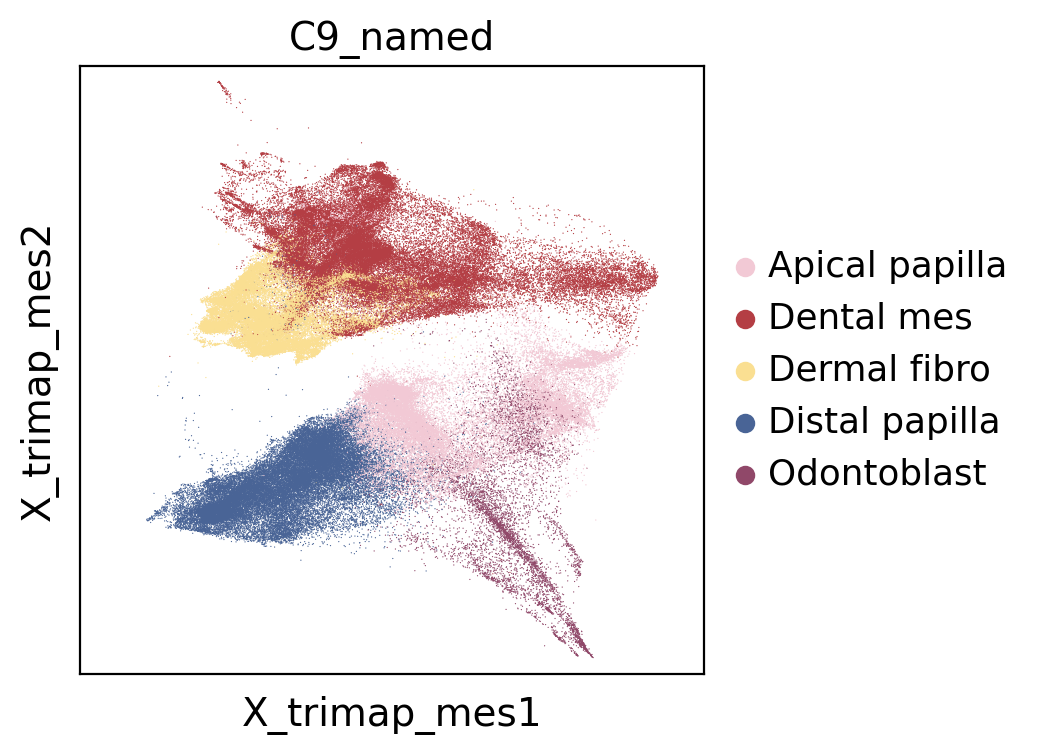

In [77]:
fig = sc.pl.embedding(mesAdata,color = "C9_named",basis="X_trimap_mes",return_fig=True,palette=colors_dict2)
ax = fig.axes[0]  # get the axis object
ax.set_xlim([-1000, 1200])
ax.set_ylim([-2200, 2100])
plt.savefig("../../results/final_plot/20250403_mes_trimap.pdf")
plt.show()

In [80]:
diffmap = pd.read_csv("../../processed_data/framework/embedding/20241119_mes_diffmap_10.csv",index_col=0)

In [ ]:
diffmap

In [109]:
diffmap = diffmap.loc[mesAdata.obs_names]


/tmp/ipykernel_521739/371317278.py:1: ImplicitModificationWarning: Setting element `.obsm['X_diffmap']` of view, initializing view as actual.
  mesAdata.obsm["X_diffmap"] = np.array(diffmap.iloc[:,[1,3]])


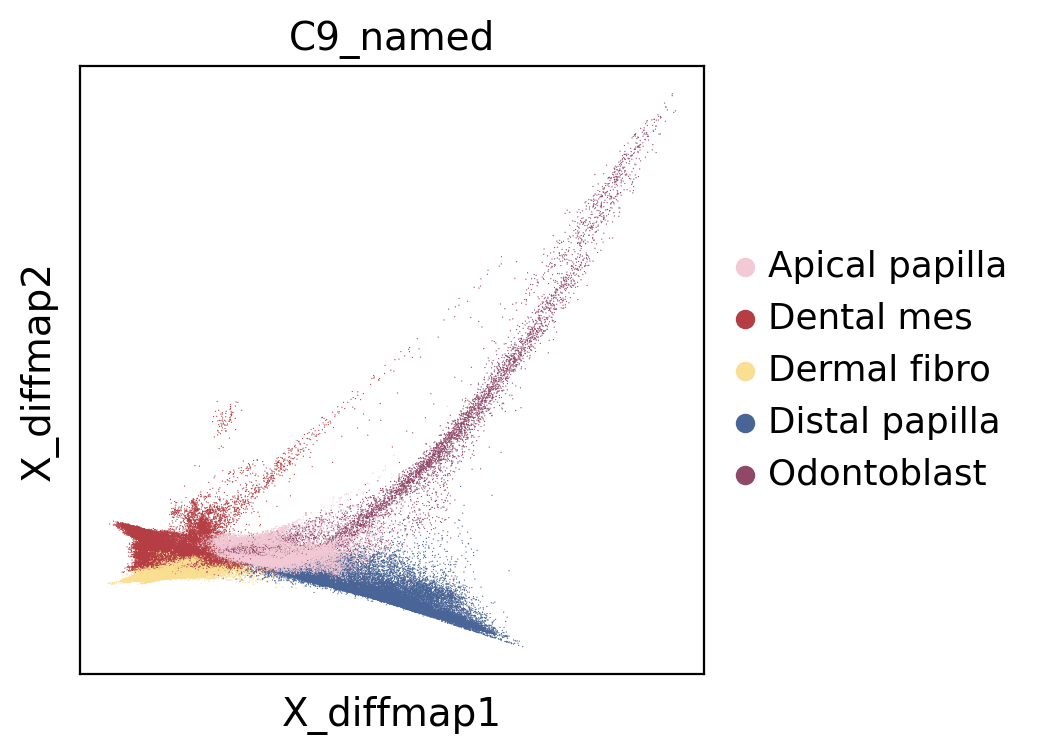

In [110]:
mesAdata.obsm["X_diffmap"] = np.array(diffmap.iloc[:,[1,3]])
sc.pl.embedding(mesAdata,color = "C9_named",basis="X_diffmap",palette=colors_dict2)

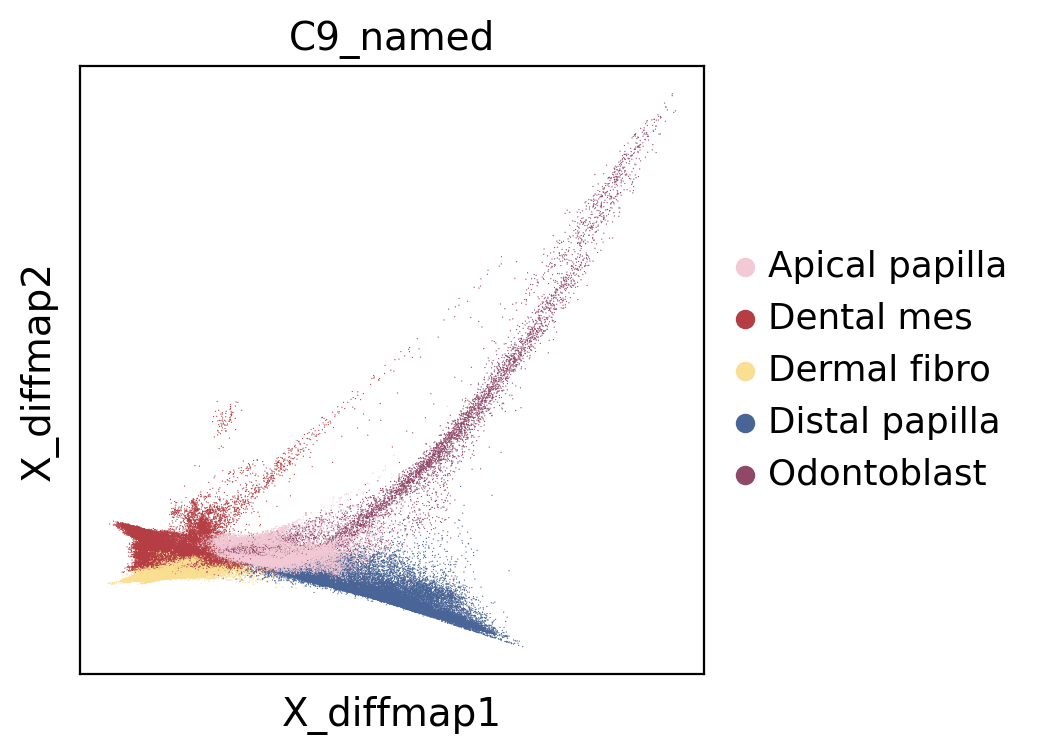

In [85]:
sc.pl.embedding(mesAdata,color = "C9_named",basis="X_diffmap",palette=colors_dict2,save="_mes")

In [ ]:
sc.pl.embedding(adata,color=["lightGBM","pseudotime","C9_named"],cmap="rainbow",basis="X_diffmap",save="_lightGBM_pred_drawgraph")

In [88]:
pseudotime = pd.read_csv("../../processed_data/trajectory/20241124_pseudotime_rerun.csv",index_col=0)

In [99]:
pseudotime.isna().iloc[:,0]

ToothNc_Junjun_AAACCCAAGCTAAGTA-1_1     False
ToothNc_Junjun_AAACCCACATCTATCT-1_1     False
ToothNc_Junjun_AAACCCAGTAGAATGT-1_1     False
ToothNc_Junjun_AAACCCAGTTCTCTCG-1_1     False
ToothNc_Junjun_AAACCCATCACAAGGG-1_1     False
                                        ...  
MolarP12_Tomoko_TTGGTTTAGTAATACG-1_1     True
MolarP12_Tomoko_TTGTGTTCACGTGTGC-1_1     True
MolarP12_Tomoko_TTGTTTGTCTTTGGAG-1_1     True
MolarP12_Tomoko_TTTGACTAGTGGTGGT-1_1     True
MolarP12_Tomoko_TTTGTTGTCCCACAGG-1_1     True
Name: mes$pseduo_merge2, Length: 152988, dtype: bool

In [111]:
keepcell = np.intersect1d(pseudotime.index[~pseudotime.isna().iloc[:,0]],mesAdata.obs_names)

In [113]:
len(keepcell)

110282

In [114]:
mesAdata = mesAdata[keepcell]

/home/gilberthan/anaconda3/envs/py311/lib/python3.11/site-packages/scanpy/plotting/_utils.py:465: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


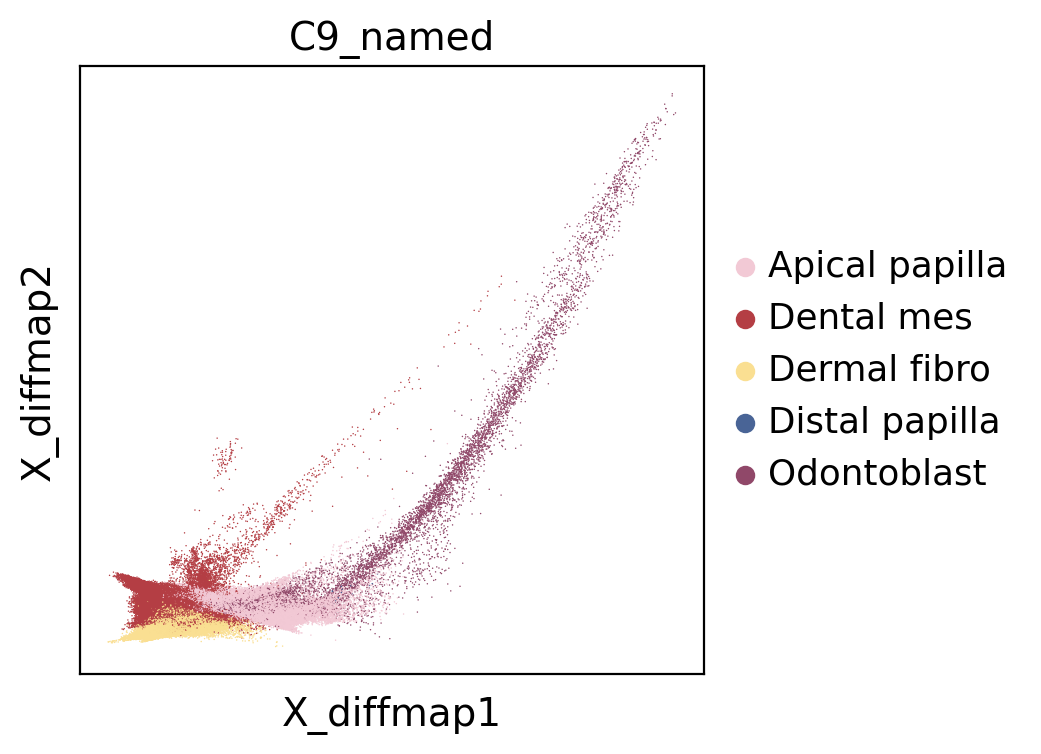

In [115]:
sc.pl.embedding(mesAdata,color = "C9_named",basis="X_diffmap",palette=colors_dict2,save="_mes")

In [91]:
mesAdata

AnnData object with n_obs × n_vars = 151705 × 36303
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'nCount_RNA', 'nFeature_RNA', 'coarse_anno_1', 'total_counts', 'log10_total_counts', 'n_genes_detected', 'mito_frac', 'ribo_frac', 'compl', 'size_factors', 'Sample', 'Project', 'Core_datasets', 'Mandibular_Maxillary', 'Molar_Incisor', 'Tooth.position', 'Histology', 'Sex', 'Gene.Type', 'Knockout_gene', 'Cre', 'Treatment', 'FACs', 'Age', 'Stage', 'Development.stage', 'Disease', 'Strain', 'Dissociation_enzyme', 'Machine', 'Species', 'Related.assay', 'Journal', 'Data.Source', 'Data.location', 'new_totals_log', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'scDblFinder_class', 'leiden', 'anno_level_1', 'Cell_ID', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'leiden_clusters_level_3', 'leiden_clusters_level_4', 'leiden_

In [117]:
epiRed

,0,1
ToothNc_Junjun_AAACCCAAGCCTGTCG-1_1,387.70102,295.33368
ToothNc_Junjun_AAACCCAAGTGATTCC-1_1,559.12860,237.71324
ToothNc_Junjun_AAACGAAGTCACCTTC-1_1,483.14680,322.51180
ToothNc_Junjun_AAACGAATCAGAACCT-1_1,465.40375,305.44113
ToothNc_Junjun_AAACGCTAGGTCCCTG-1_1,476.59802,200.12940
...,...,...
MolarE145_Outie_TTTGATCAGGATCATA.4,343.56924,360.07275
MolarE145_Outie_TTTGATCGTCGTTGGC.4,656.45215,262.24387
MolarE145_Outie_TTTGGTTAGAGGTTTA.4,338.25873,309.93870
MolarE145_Outie_TTTGTTGCAAACACCT.4,408.27402,305.82240


In [119]:
epiAdata = epiAdata[epiRed.index]

In [120]:
epiAdata.obsm["X_trimap"] = np.array(epiRed)

/tmp/ipykernel_521739/2701881521.py:1: ImplicitModificationWarning: Setting element `.obsm['X_trimap']` of view, initializing view as actual.
  epiAdata.obsm["X_trimap"] = np.array(epiRed)


In [121]:
epiAdata

AnnData object with n_obs × n_vars = 51207 × 36303
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'nCount_RNA', 'nFeature_RNA', 'coarse_anno_1', 'total_counts', 'log10_total_counts', 'n_genes_detected', 'mito_frac', 'ribo_frac', 'compl', 'size_factors', 'Sample', 'Project', 'Core_datasets', 'Mandibular_Maxillary', 'Molar_Incisor', 'Tooth.position', 'Histology', 'Sex', 'Gene.Type', 'Knockout_gene', 'Cre', 'Treatment', 'FACs', 'Age', 'Stage', 'Development.stage', 'Disease', 'Strain', 'Dissociation_enzyme', 'Machine', 'Species', 'Related.assay', 'Journal', 'Data.Source', 'Data.location', 'new_totals_log', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'scDblFinder_class', 'leiden', 'anno_level_1', 'Cell_ID', 'index', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'leiden_clusters_level_3', 'leiden_clusters_level_4', 

In [122]:
colors_dict3 = {
    'DEP': '#E6E2F1',
    'OEE lineage': '#F8E8E3',
    'PA': '#F6D481',
    'PA and eAM': '#F5A556',
    'SR': '#FB9FB9',
    'eAM and sAM': '#C94D6C',
    'mAM': '#4F4E46',
    'sAM': "#A4AD72"
}

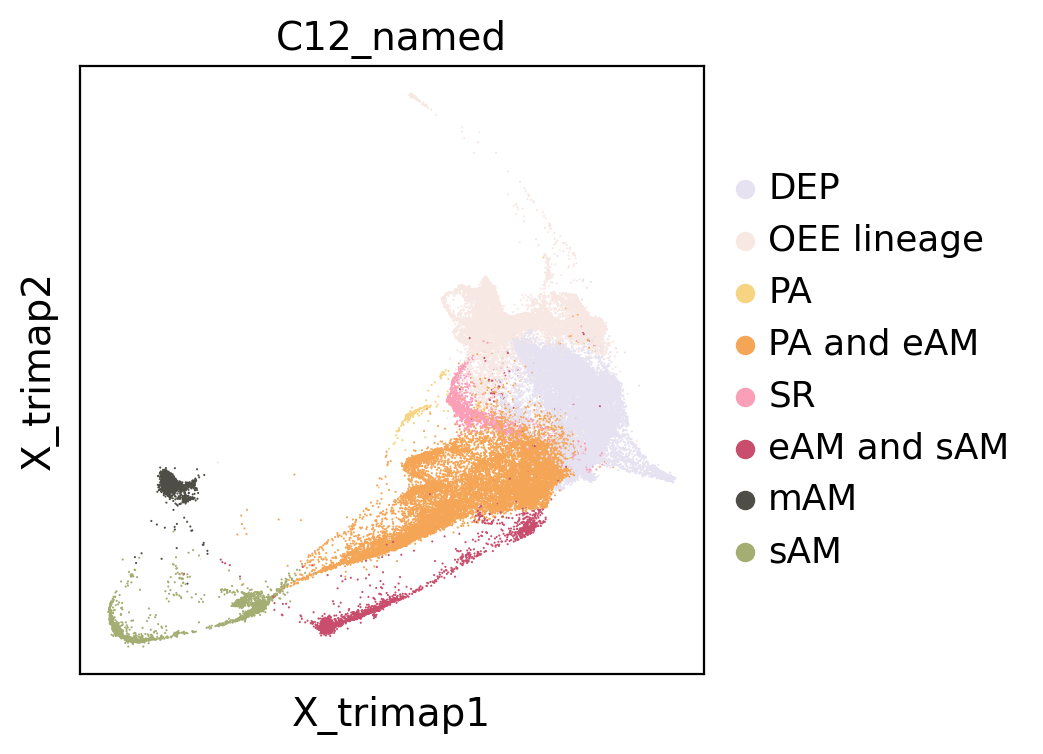

In [124]:
sc.pl.embedding(epiAdata,color = "C12_named",basis="X_trimap",palette=colors_dict3,save="_epi")

In [125]:
epiAdata.write_h5ad("../../processed_data/integrated_data/20250403_epi_lineage.h5ad")
mesAdata.write_h5ad("../../processed_data/integrated_data/20250403_mes_lineage.h5ad")